In [33]:
import pandas as pd
import numpy as np
import os

In [26]:
df = pd.read_csv(os.path.join(os.getcwd(), "data", "basis_supervise.csv")).dropna()

In [45]:
def multi_max(row):
    return max(row["future_2_cost"], row["future_3_cost"], row["future_4_cost"])

In [46]:
df["max_basis_return"] = df.apply(multi_max, axis=1)

In [47]:
df["date"] = df["date"].apply(lambda x: x.split()[0])
df.head()

,id,date,va_type,spot_price,future_1_id,future_2_id,future_3_id,future_4_id,future_1_price,future_2_price,...,future_1_basis,future_2_basis,future_3_basis,future_4_basis,future_1_cost,future_2_cost,future_3_cost,future_4_cost,max_basis_return,mean_basis_return
0,910,2023-01-03,IC,5955.8969,IC2301,IC2302,IC2303,IC2306,5958.8,5962.0,...,-2.9031,-6.1031,4.6969,73.4969,-0.009449,-0.009222,0.004140,0.028530,0.028530,0.003500
1,911,2023-01-03,IF,3887.8992,IF2301,IF2302,IF2303,IF2306,3894.2,3903.0,...,-6.3008,-15.1008,-25.7008,-18.9008,-0.031415,-0.034956,-0.034705,-0.011239,-0.011239,-0.028079
2,912,2023-01-03,IH,2641.4218,IH2301,IH2302,IH2303,IH2306,2648.6,2655.4,...,-7.1782,-13.9782,-15.9782,-18.3782,-0.052679,-0.047627,-0.031758,-0.016086,-0.016086,-0.037037
3,913,2023-01-04,IC,5952.4538,IC2301,IC2302,IC2303,IC2306,5957.0,5958.0,...,-4.5462,-5.5462,4.2538,74.6538,-0.016039,-0.008696,0.003832,0.029264,0.029264,0.002090
4,914,2023-01-04,IF,3892.9477,IF2301,IF2302,IF2303,IF2306,3898.0,3907.4,...,-5.0523,-14.4523,-20.0523,-12.4523,-0.027254,-0.034649,-0.027618,-0.007464,-0.007464,-0.024246


In [48]:
groups = df.groupby("va_type")

In [49]:
ts = []
for name, group in groups:
    result = group.set_index("date")["max_basis_return"]
    result.name = name
    ts.append(result)
aaa = pd.concat(ts, axis=1)

<Axes: xlabel='date'>

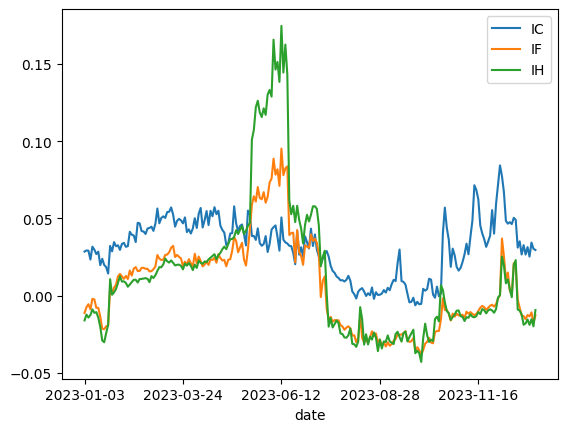

In [50]:
aaa.plot()